In [1]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model


def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

BS= 32
TS=(24,24)
train_batch= generator(r'C:\Users\athu3\Desktop\Driver-Drowsiness-Detection-using-Deep-Learning-main\MRL EYE DATA\Prepared_Data\Train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator(r'C:\Users\athu3\Desktop\Driver-Drowsiness-Detection-using-Deep-Learning-main\MRL EYE DATA\Prepared_Data\Test',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)


# img,labels= next(train_batch)
# print(img.shape)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])



Using TensorFlow backend.


Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.
2122 530





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [2]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model_history = model.fit_generator(train_batch, validation_data=valid_batch,epochs=20,steps_per_epoch=SPE ,validation_steps=VS)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





2122/2122 [==============================] - 162s 76ms/step - loss: 0.1472 - acc: 0.9453 - val_loss: 0.0941 - val_acc: 0.9636
Epoch 2/20
2122/2122 [==============================] - 133s 63ms/step - loss: 0.0760 - acc: 0.9732 - val_loss: 0.0663 - val_acc: 0.9768
Epoch 3/20
2122/2122 [==============================] - 134s 63ms/step - loss: 0.0619 - acc: 0.9778 - val_loss: 0.0509 - val_acc: 0.9808
Epoch 4/20
2122/2122 [==============================] - 139s 65ms/step - loss: 0.0511 - acc: 0.9821 - val_loss: 0.0520 - val_acc: 0.9811
Epoch 5/20
2122/2122 [==============================] - 125s 59ms/step - loss: 0.0455 - acc: 0.9838 - val_loss: 0.0412 - val_acc: 0.9849
Epoch 6/20
2122/2122 [==============================] - 127s 60ms/step - loss: 0.0409 - acc: 0.9857 - val_loss: 0.0432 - val_acc: 0.9847
Epoch 7/20
2122/2122 [==============================] - 137s 65ms/step - l

In [3]:
print(model_history)
print(model_history.model.metrics_names)

['loss', 'acc']


In [4]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Get the Epochs Count
    epochs = range(len(metric_value_1))
 
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'orange', label = metric_name_2)
 
    plt.title(str(plot_name))
 
    plt.legend()

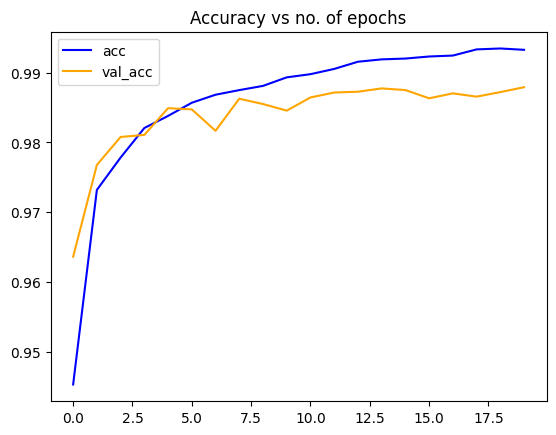

In [8]:
plot_metric(model_history, 'acc', 'val_acc', 'Accuracy vs no. of epochs')

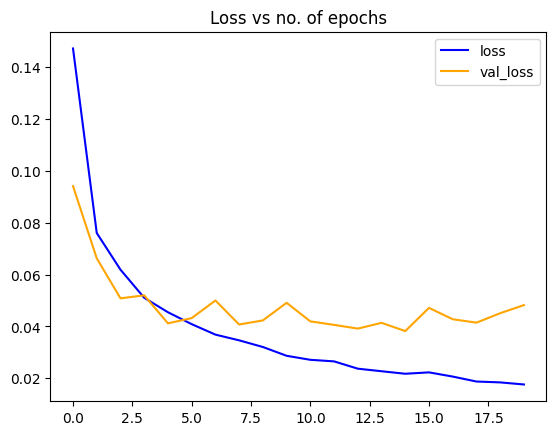

In [7]:
plot_metric(model_history, 'loss', 'val_loss', 'Loss vs no. of epochs')